In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pythermalcomfort.models import set_tmp

In [7]:
df = pd.read_csv('CN_DB.csv')
df.head()

,suject_id,timestamp,season,city,climate,building_type,heating_type,gender,age,ht,...,clo,met,ta,rh,vel,tg,top,tr,t_out_min,latitude
0,1,1/30/19 10:35,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Female,18-30,170.0,...,1.10,1.0,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,36.62
1,2,1/30/19 10:42,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Female,41-50,168.0,...,1.83,0.9,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,36.62
2,3,1/30/19 10:45,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,41-50,170.0,...,1.36,0.9,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,36.62
3,4,1/30/19 10:47,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,18-30,178.0,...,1.58,0.9,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,36.62
4,5,1/31/19 20:20,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,18-30,174.0,...,1.38,0.9,20.9,33.0,0.0,19.8,20.0,19.8,-7.28,36.62


In [19]:
# check the heating_type unique values
print(df['heating_type'].unique())

['Radiator heating' 'Convection heating' 'Radiant floor heating'
 'Naturally Ventilated' 'Ceiling capillary heating'
 'Air conditioning heating' 'Others' 'self-heating' 'Furnace heating'
 'Floor radiation + fan coil' 'Small electric heater heating']


In [20]:
# group by city, using mean values
df_city = df.groupby('city').agg(
    records=('city', 'size'),
    thermal_sensation=('thermal_sensation', 'mean'),
    # thermal_comfort=('thermal_comfort', 'mean'),
    # thermal_acceptability=('thermal_acceptability', 'mean'),
    ta=('ta', 'mean'),
    top=('top', 'mean'),
    clo=('clo', 'mean'),
    latitude=('latitude', 'mean'),
).reset_index()

# calcualte the percentage of Radiator heating for each city and assign the value to df_city
df_city['p_heating'] = df_city['city'].apply(lambda x: df[df['city'] == x]['heating_type'].value_counts().get('Radiator heating', 0) / df[df['city'] == x]['heating_type'].count())

In [21]:
# resort the df_city by latitude
df_city = df_city.sort_values(by='latitude')
df_city

,city,records,thermal_sensation,ta,top,clo,latitude,p_heating
6,HainanSanya,5,0.600000,24.880000,24.880000,0.332000,18.25,0.000000
5,GuangdongGuangzhou,997,-0.013039,23.850150,23.876128,0.859910,23.13,0.000000
32,YunnanKunming,415,-1.154217,13.617108,13.617108,0.647133,24.87,0.000000
2,FujianFuzhou,7,-0.714286,18.100000,18.100000,0.351429,26.08,0.000000
4,FujianZhenjiang,2,-0.500000,22.900000,22.900000,0.305000,26.10,0.000000
3,FujianNanping,4,0.000000,17.900000,17.900000,0.417500,26.64,0.000000
18,HunanHengyang,1,-1.000000,16.900000,16.900000,0.660000,26.89,0.000000
17,HunanChangsha,1108,-0.396029,17.222563,17.413267,0.947500,28.23,0.000000
29,SichuanZigong,23,-0.217391,11.026087,11.026087,1.586522,29.34,0.000000
20,Lhasa,355,-1.095775,10.640845,10.640845,1.253380,29.65,0.005634


Text(0, 0.5, 'p_heating')

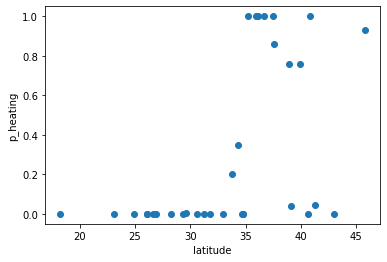

In [25]:
# scatter plot the p_heating across latitude
plt.scatter(df_city['latitude'], df_city['p_heating'])
plt.xlabel('latitude')
plt.ylabel('p_heating')

In [ ]:
# Northern cities p_heating <1 but should be 1
for i in ["ShandongYantai", "LiaoningDalian", "Tianjin", "Beijing", "Baotou", "Hohhot", "LiaoningBenxi", "Turpan", "HeilongjiangHarbin"]:
    print(i)
    print(df[df['city'] == i]['heating_type'].value_counts())
    print("***************************************\n")

In [18]:
# Cities nearby the boudnary p_heating <1 but should be 1
for i in ["ShaanxiXi'an", "HenanPingdingshan", "HenanLuoyang", "HenanZhengzhou", "HenanKaifeng",]:
    print(i)
    print(df[df['city'] == i]['heating_type'].value_counts())
    print("***************************************\n")

Shanghai
Convection heating               784
Radiant floor heating            726
Naturally Ventilated             390
Air conditioning heating         200
Small electric heater heating     23
Others                             8
Name: heating_type, dtype: int64
***************************************

HenanPingdingshan
Naturally Ventilated    4
Radiator heating        1
Name: heating_type, dtype: int64
***************************************

ShaanxiXi'an
Radiant floor heating    594
Radiator heating         585
Convection heating       507
Name: heating_type, dtype: int64
***************************************

HenanLuoyang
Convection heating      43
Naturally Ventilated     2
Name: heating_type, dtype: int64
***************************************

HenanZhengzhou
Convection heating       92
Radiant floor heating     4
Name: heating_type, dtype: int64
***************************************

HenanKaifeng
Naturally Ventilated    1
Name: heating_type, dtype: int64
*******************

In [ ]:
# Cities nearby the boudnary p_heating should between 0 and 1
for i in ["HenanNanyang"]:
    print(i)
    print(df[df['city'] == i]['heating_type'].value_counts())
    print("***************************************\n")